# Regression with CART Trees - Lab

## Introduction

In this lab, we'll make use of what we learned in the previous lesson to build a model for the [Petrol Consumption Dataset](https://www.kaggle.com/harinir/petrol-consumption) from Kaggle. This model will be used to predict gasoline consumption for a bunch of examples, based on drivers' features.

## Objectives

In this lab you will: 

- Fit a decision tree regression model with scikit-learn

## Import necessary libraries 

In [1]:
# Import libraries 
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 

## The dataset 

- Import the `'petrol_consumption.csv'` dataset 
- Print the first five rows of the data 
- Print the dimensions of the data 

In [3]:
# Import the dataset
dataset = pd.read_csv("./petrol_consumption.csv")
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [55]:
# Print the first five rows
dataset.tail(-20)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
20,7.00,4593,7834,0.663,649
21,8.00,4983,602,0.602,540
22,9.00,4897,2449,0.511,464
23,9.00,4258,4686,0.517,547
24,8.50,4574,2619,0.551,460
25,9.00,3721,4746,0.544,566
26,8.00,3448,5399,0.548,577
27,7.50,3846,9061,0.579,631
28,8.00,4188,5975,0.563,574
29,9.00,3601,4650,0.493,534


In [5]:
# Print the dimensions of the data
dataset.shape

(48, 5)

- Print the summary statistics of all columns in the data: 

In [6]:
# Describe the dataset
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


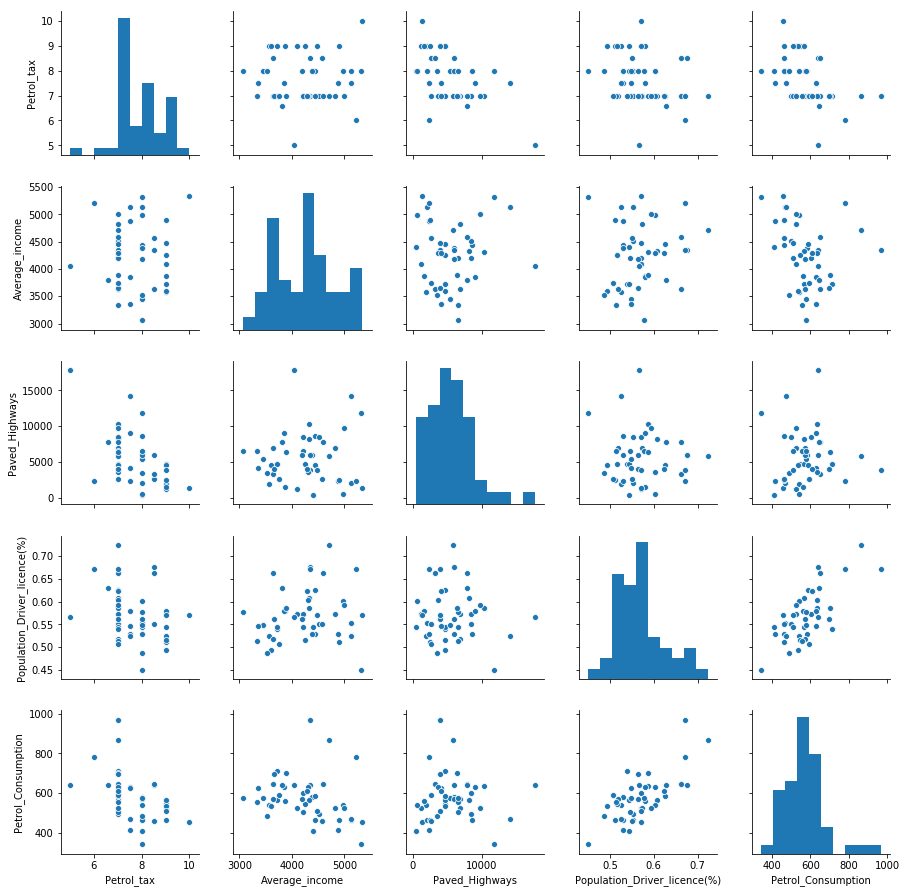

In [9]:
import seaborn as sns
sns.pairplot(dataset)

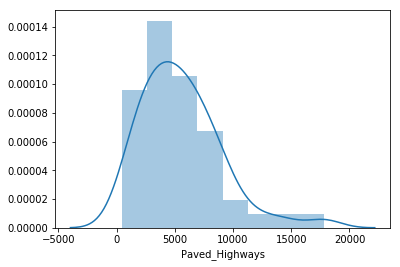

In [11]:
sns.distplot(dataset['Paved_Highways'])

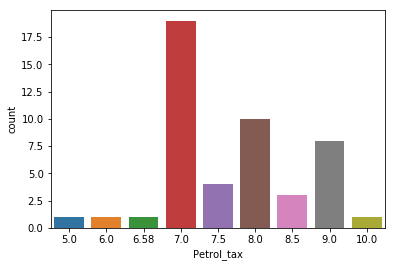

In [15]:
sns.countplot(dataset['Petrol_tax'])

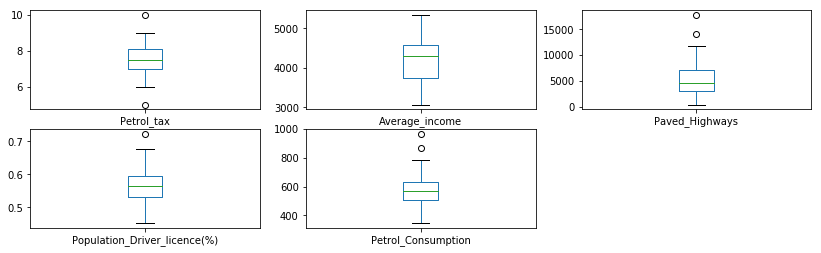

In [46]:
# Plot the data - box and whisker plots
import matplotlib.pyplot as plt
%matplotlib inline

dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(14,4)) # layout=(1,5), figsize=(14,4)
plt.show()

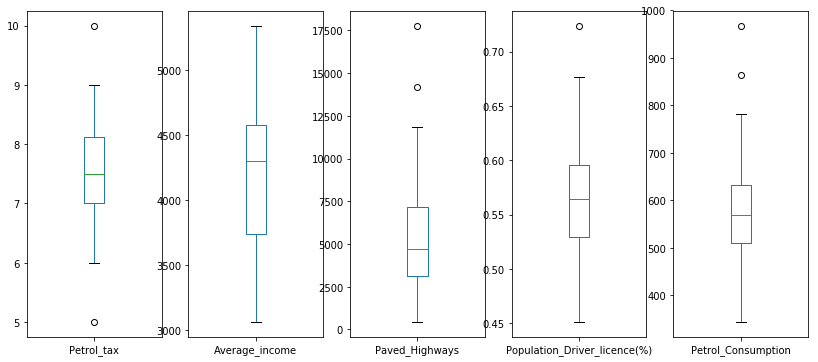

In [51]:
dataset.plot(kind='box', subplots='True', layout=(1,5), figsize=(14,6));

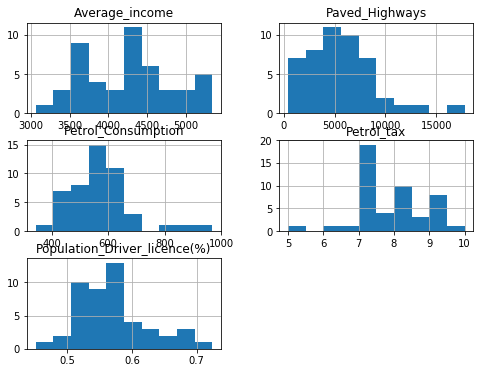

In [38]:
# histograms
dataset.hist(figsize=(8,6))
plt.show()

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


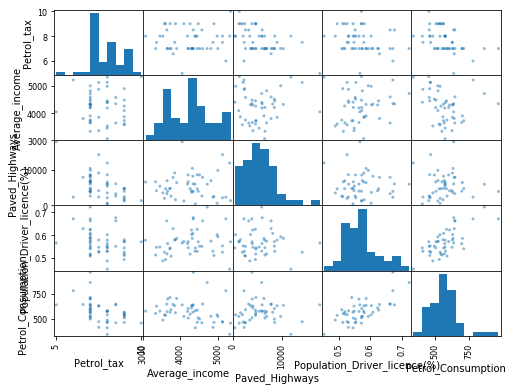

In [42]:
# scatter plot matrix
import pandas as pd
pd.scatter_matrix(dataset, figsize=(8,6))
plt.show()

## Create training and test sets

- Assign the target column `'Petrol_Consumption'` to `y` 
- Assign the remaining independent variables to `X` 
- Split the data into training and test sets using a 80/20 split 
- Set the random state to 42 

In [20]:
print(dataset[:4])

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  


In [61]:
# Split the data into training and test sets
X = dataset.drop('Petrol_Consumption', axis=1)
y = dataset['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =  42 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 4) (9, 4) (35,) (9,)


## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [62]:
# Import the DecisionTreeRegressor class 
from sklearn.tree import DecisionTreeRegressor

# Instantiate and fit a regression tree model to training data 
regressor = DecisionTreeRegressor(random_state=42)
model = regressor.fit(X_train, y_train)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

## Make predictions and calculate the MAE, MSE, and RMSE

Use the above model to generate predictions on the test set. 

Just as with decision trees for classification, there are several commonly used metrics for evaluating the performance of our model. The most common metrics are:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

If these look familiar, it's likely because you have already seen them before -- they are common evaluation metrics for any sort of regression model, and as we can see, regressions performed with decision tree models are no exception!

Since these are common evaluation metrics, `sklearn` has functions for each of them that we can use to make our job easier. You'll find these functions inside the `metrics` module. In the cell below, calculate each of the three evaluation metrics. 

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 71.77777777777777
Mean Squared Error: 7295.111111111111
Root Mean Squared Error: 85.41142260325086


## Level Up (Optional)

- Look at the hyperparameters used in the regression tree, check their value ranges in official doc and try running some optimization by growing a number of trees in a loop 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results 

- Check for outliers, try normalization and see the impact on the output 

In [ ]:
# Data does include outliers and different units of measurements and therefore, may need to be normalized.
# Q: Does Decision Trees need to be normalized?

In [ ]:
# Remove Outliers
""" Cap outliers
Find the outliers and cap them. (Use (Q1 - 1.5 IQR) as the minimum cap and (Q3 + 1.5 IQR) as the max cap. 
The decision criteria is you should consider the datapoints which only falls within this range. 
The data points which fall outside this range are outliers and the entire row needs to be removed.

Petrol_tax

q1=df1['Petrol_tax'].quantile(0.25)
q3=df1['Petrol_tax'].quantile(0.75)
iqr=q3-q1
print(iqr)
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df1=df1[~((df['Petrol_tax']<ll) | (df1['Petrol_tax']>ul))]
df1.shape
1.125"""

In [57]:
#1.3.2  Detect Outliers in the dataset
# Find the rows in the dataset impacted by outliers

from scipy import stats
import numpy as np
threshold = 3

z_score = np.abs(stats.zscore(dataset))  # z-scores => (x-mean)/sd
outliers_rowid = np.where(z_score > 3)
print(outliers_rowid)

print(dataset.shape)
for rowid in outliers_rowid:
    dataset.drop(dataset.index[rowid], axis = 0, inplace=True)
print(dataset.shape)

(array([36, 39], dtype=int64), array([2, 4], dtype=int64))
(48, 5)
(44, 5)


### Model 2 - Different values for max depth

In [65]:
# Different values for max depth

for depth in range(1,10):
    print(f'\nMax Depth: {depth}')
    tc_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model = tc_reg.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate these predictions
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))



Max Depth: 1
Mean Absolute Error: 112.25396825396824
Mean Squared Error: 15100.009070294784
Root Mean Squared Error: 122.8820941809456

Max Depth: 2
Mean Absolute Error: 91.62962962962963
Mean Squared Error: 10472.49459876543
Root Mean Squared Error: 102.33520703436052

Max Depth: 3
Mean Absolute Error: 74.86111111111111
Mean Squared Error: 6824.7617455418385
Root Mean Squared Error: 82.61211621512814

Max Depth: 4
Mean Absolute Error: 71.89999999999999
Mean Squared Error: 6318.490987654319
Root Mean Squared Error: 79.48893625942115

Max Depth: 5
Mean Absolute Error: 70.50925925925925
Mean Squared Error: 7311.1149691358005
Root Mean Squared Error: 85.50505814942062

Max Depth: 6
Mean Absolute Error: 66.37037037037037
Mean Squared Error: 6348.734567901234
Root Mean Squared Error: 79.6789468297695

Max Depth: 7
Mean Absolute Error: 78.5
Mean Squared Error: 8810.361111111111
Root Mean Squared Error: 93.86352385837169

Max Depth: 8
Mean Absolute Error: 71.77777777777777
Mean Squared Error

## Summary 

In this lesson, you implemented the architecture to train a tree regressor and predict values for unseen data. You saw that with a vanilla approach, the results were not so great, and this requires further pre-tuning of the model (what we described as hyperparameter optimization and pruning in the case of trees). 